In [ ]:
pip install koreanize-matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 41.7 MB/s eta 0:00:00


In [ ]:
pip install krwordrank

In [ ]:
pip install Jpype1>=0.7.0

In [ ]:
pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 30.2 MB/s eta 0:00:00


In [ ]:
pip install scikit-learn

In [ ]:
pip install git+https://github.com/haven-jeon/PyKoSpacing.git

  Cloning https://github.com/haven-jeon/PyKoSpacing.git to /tmp/pip-req-build-p4xswn_n
  Running command git clone --filter=blob:none --quiet https://github.com/haven-jeon/PyKoSpacing.git /tmp/pip-req-build-p4xswn_n
  Resolved https://github.com/haven-jeon/PyKoSpacing.git to commit b32a889cbd10b006d2f4aba118f0cd5b677e2979
  Preparing metadata (setup.py) ... done
  Created wheel for pykospacing: filename=pykospacing-0.5-py3-none-any.whl size=2286920 sha256=9a274666ae66caaeb8353cc5fb37e82f946268b9602b85dd3670a354dcc2eafd
  Stored in directory: /tmp/pip-ephem-wheel-cache-4dn_q61f/wheels/76/b3/33/dda14886ee76b8e53eb05580a14dfcf9145e9eb9d282c53f28
Successfully built pykospacing


In [ ]:
import numpy as np
import pandas as pd

import re
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
import matplotlib.patches as patches
import matplotlib.dates as mdates
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from collections import defaultdict
from itertools import combinations, chain
from datetime import datetime
import koreanize_matplotlib

from krwordrank.word import summarize_with_keywords
from krwordrank.word import KRWordRank
from krwordrank.hangle import normalize
from konlpy.tag import Okt
from collections import Counter
from pykospacing import Spacing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

pd.set_option('display.max_columns', None)

/usr/local/lib/python3.10/dist-packages/koreanize_matplotlib/koreanize_matplotlib.py:16: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  is_support_createFontList = LooseVersion(matplotlib.__version__) < '3.2'
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/version.py:337: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


In [ ]:
import pandas as pd
df1 = pd.read_csv('P_PJT10_DATA1.csv')
df1.head()

,id,title,author,genre,description,rating,date,completed,age,free,link
0,756056,가난을 등에 업은 소녀,B급달궁 / 오은지,"스토리, 로맨스",흔하디 흔한 재벌후계자와 캔디도 울고 갈 박복한 가난소녀의 파란만장 동거기!인기작 ...,9.13,2020.10.19 00:00,True,전체연령가,True,https://comic.naver.com/webtoon/list?titleId=7...
1,670144,가담항설,랑또,"스토리, 판타지",이번 주인공은 돌이다!돌이지만 동료도 모으고 악당도 물리친다!랑또 작가표 동양 판타...,9.98,2020.10.07 23:00,True,12세 이용가,True,https://comic.naver.com/webtoon/list?titleId=6...
2,732071,가령의 정체불명 이야기,가령,"옴니버스, 드라마",어느 날... 인어가 내게 말을 걸어왔다. 눈을 떠보니 총구가 있었다. 그리고 몸이...,9.95,2020.02.03 23:22,True,15세 이용가,True,https://comic.naver.com/webtoon/list?titleId=7...
3,703844,가비지타임,2사장,"스토리, 스포츠","한국 최초 한국형 고교스포츠 웹툰!열혈따윈 개나 줘, 낙오자들 뿐인 농구부의 운명은?",9.96,2022.12.24 22:57,False,전체연령가,False,https://comic.naver.com/webtoon/list?titleId=7...
4,785701,가상&RPG,주다현,"스토리, 판타지","""사람은 좀 죽여도 싸우는건 싫어해요."" 게임에서조차 집 바깥을 나가지 않는 '제리...",9.91,2022.10.19 23:00,False,12세 이용가,False,https://comic.naver.com/webtoon/list?titleId=7...


In [ ]:
df2 = pd.read_csv('P_PJT10_DATA2.csv')
df2.head()

,id,title,author,summary,rating,genre,format,description,serial,potenup,link
0,779637,예수쟁이 다이어리,ahnc****,예수쟁이의 일상,9.30,daily,에피소드,"기독교가 세상에서 제일 싫었던 사람, 어느날 예수쟁이가 되다!\r\n안티 크리스천에...",False,False,https://comic.naver.com/bestChallenge/list?tit...
1,748367,이래서 애들은,dksk****,다양한장르의 거짓말,9.89,"daily, comic",옴니버스,하숙집 꼬마를 속이는 하숙생 이야기,False,False,https://comic.naver.com/bestChallenge/list?tit...
2,748498,나의 섭식장애 일기,vldk****,섭식장애이야기,9.85,daily,에피소드,섭식장애를 겪었던 나의 이야기,False,False,https://comic.naver.com/bestChallenge/list?tit...
3,683018,오늘의 후기,chae****,매일 살아가는 후기,9.77,"daily, comic",에피소드,"여러분은 오늘 무슨 일이 있었나요? 매일을 살아가는 김챈의 그림일기, 오늘의 후기!...",False,False,https://comic.naver.com/bestChallenge/list?tit...
4,756652,제제와 함께,ls****,장애아이와 형제,9.73,"daily, drama",에피소드,출산도 육아도 처음인 초보맘에게 너무나 소중한 첫째 아들이 태어났고..둘째 딸의 출...,False,False,https://comic.naver.com/bestChallenge/list?tit...


### Data 전처리


In [ ]:
print('df1',df1.shape, 'df2', df2.shape)

df1 (2100, 11) df2 (3192, 11)


#### 정규 웹툰
---

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           2100 non-null   int64  
 1   title        2100 non-null   object 
 2   author       2100 non-null   object 
 3   genre        2100 non-null   object 
 4   description  2100 non-null   object 
 5   rating       2100 non-null   float64
 6   date         2100 non-null   object 
 7   completed    2100 non-null   bool   
 8   age          1998 non-null   object 
 9   free         2100 non-null   bool   
 10  link         2100 non-null   object 
dtypes: bool(2), float64(1), int64(1), object(7)
memory usage: 151.9+ KB


In [ ]:
df1['date'] = df1['date'].apply(lambda x: x.split(' ')[0])

In [ ]:
df1['date'] = pd.to_datetime(df1['date'])

In [ ]:
df1['date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2100 entries, 0 to 2099
Series name: date
Non-Null Count  Dtype         
--------------  -----         
2100 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 16.5 KB


In [ ]:
df1.isnull().sum()

,0
id,0
title,0
author,0
genre,0
description,0
rating,0
date,0
completed,0
age,102
free,0


In [ ]:
df1['age'].unique()

array(['전체연령가', '12세 이용가', '15세 이용가', '18세 이용가', nan], dtype=object)

In [ ]:
df1[df1['age'].isnull()].head()

,id,title,author,genre,description,rating,date,completed,age,free,link
44,786933,갤러리L : 당신의 기억을...,조홍 / 라미아,"스토리, 로맨스",취업 면접에서 번번이 미끄러지는 순진은 자신 때문에 사고를 당해 휠체어 신세가 된 ...,9.27,2022-01-03,True,NaN,True,https://comic.naver.com/webtoon/list?titleId=7...
117,797512,구덩이,철이,"스토리, 액션",[“110억이면 인생 걸만 하잖아?”]마늘밭에 잠들어 있던 욕망의 구덩이가 파헤쳐지...,9.70,2022-07-18,True,NaN,True,https://comic.naver.com/webtoon/list?titleId=7...
125,783538,구원자 요즘 뭐해요,판톰,"스토리, 판타지","마왕이 사라진뒤 몇 년 후, 구원자의 꿈에 다시 마왕이 나타난다. 자신을 구해달라는...",9.68,2021-11-22,True,NaN,True,https://comic.naver.com/webtoon/list?titleId=7...
133,776302,국왕과 성기사의 약탈혼,이린비 / 박지은,"스토리, 로맨스","“그래, 왕이 되었지. 가지고 싶은 건 다 빼앗아 가지려고.”왕위를 찬탈하고 주변국...",9.90,2021-08-23,True,NaN,True,https://comic.naver.com/webtoon/list?titleId=7...
163,801483,그녀는 가면을 쓴다,월해 / 템푸,"스토리, 판타지",카이엔 백작가의 후계자로서 레인저 부대의 부대장으로 살아가던 브릴리아. 그녀는 동생...,9.64,2022-10-24,True,NaN,True,https://comic.naver.com/webtoon/list?titleId=8...


In [ ]:
df1['age'] = df1['age'].fillna('정보 없음')

In [ ]:
df1.describe()

,id,rating,date
count,2100.000000,2100.000000,2100
mean,678611.872381,9.736071,2020-03-30 17:55:53.142856960
min,15439.000000,3.810000,2006-08-03 00:00:00
25%,679568.750000,9.770000,2019-01-16 18:00:00
50%,748683.500000,9.900000,2021-12-07 00:00:00
75%,784821.250000,9.950000,2022-12-25 00:00:00
max,804418.000000,9.990000,2022-12-30 00:00:00
std,188885.351892,0.559215,NaN


#### 베스트 도전 웹툰
---

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           3192 non-null   int64  
 1   title        3192 non-null   object 
 2   author       3192 non-null   object 
 3   summary      3191 non-null   object 
 4   rating       3192 non-null   float64
 5   genre        3192 non-null   object 
 6   format       3192 non-null   object 
 7   description  3192 non-null   object 
 8   serial       3192 non-null   bool   
 9   potenup      3192 non-null   bool   
 10  link         3192 non-null   object 
dtypes: bool(2), float64(1), int64(1), object(7)
memory usage: 230.8+ KB


In [ ]:
df2.isnull().sum()

,0
id,0
title,0
author,0
summary,1
rating,0
genre,0
format,0
description,0
serial,0
potenup,0


In [ ]:
df2.head()

,id,title,author,summary,rating,genre,format,description,serial,potenup,link
0,779637,예수쟁이 다이어리,ahnc****,예수쟁이의 일상,9.30,daily,에피소드,"기독교가 세상에서 제일 싫었던 사람, 어느날 예수쟁이가 되다!\r\n안티 크리스천에...",False,False,https://comic.naver.com/bestChallenge/list?tit...
1,748367,이래서 애들은,dksk****,다양한장르의 거짓말,9.89,"daily, comic",옴니버스,하숙집 꼬마를 속이는 하숙생 이야기,False,False,https://comic.naver.com/bestChallenge/list?tit...
2,748498,나의 섭식장애 일기,vldk****,섭식장애이야기,9.85,daily,에피소드,섭식장애를 겪었던 나의 이야기,False,False,https://comic.naver.com/bestChallenge/list?tit...
3,683018,오늘의 후기,chae****,매일 살아가는 후기,9.77,"daily, comic",에피소드,"여러분은 오늘 무슨 일이 있었나요? 매일을 살아가는 김챈의 그림일기, 오늘의 후기!...",False,False,https://comic.naver.com/bestChallenge/list?tit...
4,756652,제제와 함께,ls****,장애아이와 형제,9.73,"daily, drama",에피소드,출산도 육아도 처음인 초보맘에게 너무나 소중한 첫째 아들이 태어났고..둘째 딸의 출...,False,False,https://comic.naver.com/bestChallenge/list?tit...


In [ ]:
df2['summary'] = df2['summary'].fillna('정보 없음')

In [ ]:
df2.describe()

,id,rating
count,3192.000000,3192.000000
mean,632774.682018,9.639395
std,167869.962401,0.387941
min,3955.000000,5.380000
25%,584652.750000,9.590000
50%,690407.500000,9.780000
75%,738146.500000,9.860000
max,803576.000000,9.920000


#### 정규 웹툰
---

In [ ]:
df1.head()

,id,title,author,genre,description,rating,date,completed,age,free,link
0,756056,가난을 등에 업은 소녀,B급달궁 / 오은지,"스토리, 로맨스",흔하디 흔한 재벌후계자와 캔디도 울고 갈 박복한 가난소녀의 파란만장 동거기!인기작 ...,9.13,2020-10-19,True,전체연령가,True,https://comic.naver.com/webtoon/list?titleId=7...
1,670144,가담항설,랑또,"스토리, 판타지",이번 주인공은 돌이다!돌이지만 동료도 모으고 악당도 물리친다!랑또 작가표 동양 판타...,9.98,2020-10-07,True,12세 이용가,True,https://comic.naver.com/webtoon/list?titleId=6...
2,732071,가령의 정체불명 이야기,가령,"옴니버스, 드라마",어느 날... 인어가 내게 말을 걸어왔다. 눈을 떠보니 총구가 있었다. 그리고 몸이...,9.95,2020-02-03,True,15세 이용가,True,https://comic.naver.com/webtoon/list?titleId=7...
3,703844,가비지타임,2사장,"스토리, 스포츠","한국 최초 한국형 고교스포츠 웹툰!열혈따윈 개나 줘, 낙오자들 뿐인 농구부의 운명은?",9.96,2022-12-24,False,전체연령가,False,https://comic.naver.com/webtoon/list?titleId=7...
4,785701,가상&RPG,주다현,"스토리, 판타지","""사람은 좀 죽여도 싸우는건 싫어해요."" 게임에서조차 집 바깥을 나가지 않는 '제리...",9.91,2022-10-19,False,12세 이용가,False,https://comic.naver.com/webtoon/list?titleId=7...


In [ ]:
# 장르의 구성이 (스토리/옴니버스, 장르)로 이루어져 있음 -> 스토리 형식과 장르를 나누어 줌
df1['format'] = df1['genre'].apply(lambda x: x.split(', ')[0])
df1['genre1'] = df1['genre'].apply(lambda x: x.split(', ')[1])
df1.head()

,id,title,author,genre,description,rating,date,completed,age,free,link,format,genre1
0,756056,가난을 등에 업은 소녀,B급달궁 / 오은지,"스토리, 로맨스",흔하디 흔한 재벌후계자와 캔디도 울고 갈 박복한 가난소녀의 파란만장 동거기!인기작 ...,9.13,2020-10-19,True,전체연령가,True,https://comic.naver.com/webtoon/list?titleId=7...,스토리,로맨스
1,670144,가담항설,랑또,"스토리, 판타지",이번 주인공은 돌이다!돌이지만 동료도 모으고 악당도 물리친다!랑또 작가표 동양 판타...,9.98,2020-10-07,True,12세 이용가,True,https://comic.naver.com/webtoon/list?titleId=6...,스토리,판타지
2,732071,가령의 정체불명 이야기,가령,"옴니버스, 드라마",어느 날... 인어가 내게 말을 걸어왔다. 눈을 떠보니 총구가 있었다. 그리고 몸이...,9.95,2020-02-03,True,15세 이용가,True,https://comic.naver.com/webtoon/list?titleId=7...,옴니버스,드라마
3,703844,가비지타임,2사장,"스토리, 스포츠","한국 최초 한국형 고교스포츠 웹툰!열혈따윈 개나 줘, 낙오자들 뿐인 농구부의 운명은?",9.96,2022-12-24,False,전체연령가,False,https://comic.naver.com/webtoon/list?titleId=7...,스토리,스포츠
4,785701,가상&RPG,주다현,"스토리, 판타지","""사람은 좀 죽여도 싸우는건 싫어해요."" 게임에서조차 집 바깥을 나가지 않는 '제리...",9.91,2022-10-19,False,12세 이용가,False,https://comic.naver.com/webtoon/list?titleId=7...,스토리,판타지


In [ ]:
df1['weekday'] = df1['date'].dt.weekday
df1.head()

,id,title,author,genre,description,rating,date,completed,age,free,link,format,genre1,weekday
0,756056,가난을 등에 업은 소녀,B급달궁 / 오은지,"스토리, 로맨스",흔하디 흔한 재벌후계자와 캔디도 울고 갈 박복한 가난소녀의 파란만장 동거기!인기작 ...,9.13,2020-10-19,True,전체연령가,True,https://comic.naver.com/webtoon/list?titleId=7...,스토리,로맨스,0
1,670144,가담항설,랑또,"스토리, 판타지",이번 주인공은 돌이다!돌이지만 동료도 모으고 악당도 물리친다!랑또 작가표 동양 판타...,9.98,2020-10-07,True,12세 이용가,True,https://comic.naver.com/webtoon/list?titleId=6...,스토리,판타지,2
2,732071,가령의 정체불명 이야기,가령,"옴니버스, 드라마",어느 날... 인어가 내게 말을 걸어왔다. 눈을 떠보니 총구가 있었다. 그리고 몸이...,9.95,2020-02-03,True,15세 이용가,True,https://comic.naver.com/webtoon/list?titleId=7...,옴니버스,드라마,0
3,703844,가비지타임,2사장,"스토리, 스포츠","한국 최초 한국형 고교스포츠 웹툰!열혈따윈 개나 줘, 낙오자들 뿐인 농구부의 운명은?",9.96,2022-12-24,False,전체연령가,False,https://comic.naver.com/webtoon/list?titleId=7...,스토리,스포츠,5
4,785701,가상&RPG,주다현,"스토리, 판타지","""사람은 좀 죽여도 싸우는건 싫어해요."" 게임에서조차 집 바깥을 나가지 않는 '제리...",9.91,2022-10-19,False,12세 이용가,False,https://comic.naver.com/webtoon/list?titleId=7...,스토리,판타지,2


In [ ]:
df1['year'] = df1['date'].dt.year
df1['month'] = df1['date'].dt.month
df1['ym'] = df1['date'].dt.strftime('%Y-%m')

In [ ]:
df1['genre1'].unique()

array(['로맨스', '판타지', '드라마', '스포츠', '개그', '일상', '스릴러', '액션', '감성', '무협/사극'],
      dtype=object)

In [ ]:
df1['rating'].mean()

9.736071428571428

In [ ]:
df1['title'].nunique()

2100

#### 베스트 도전 웹툰
---
- 포텐업: 네이버가 직접 프로듀싱하고 정식연재까지 지원 되는 일종의 소규모 공모전

- 선정 기준: 독자들이 참여한 조회수, 댓글수, 별점수, 내공값, 좋아요 등의 수치로 2개월에 한번 상위 몇 개의 작품을 선정

In [ ]:
df2.head()

,id,title,author,summary,rating,genre,format,description,serial,potenup,link
0,779637,예수쟁이 다이어리,ahnc****,예수쟁이의 일상,9.30,daily,에피소드,"기독교가 세상에서 제일 싫었던 사람, 어느날 예수쟁이가 되다!\r\n안티 크리스천에...",False,False,https://comic.naver.com/bestChallenge/list?tit...
1,748367,이래서 애들은,dksk****,다양한장르의 거짓말,9.89,"daily, comic",옴니버스,하숙집 꼬마를 속이는 하숙생 이야기,False,False,https://comic.naver.com/bestChallenge/list?tit...
2,748498,나의 섭식장애 일기,vldk****,섭식장애이야기,9.85,daily,에피소드,섭식장애를 겪었던 나의 이야기,False,False,https://comic.naver.com/bestChallenge/list?tit...
3,683018,오늘의 후기,chae****,매일 살아가는 후기,9.77,"daily, comic",에피소드,"여러분은 오늘 무슨 일이 있었나요? 매일을 살아가는 김챈의 그림일기, 오늘의 후기!...",False,False,https://comic.naver.com/bestChallenge/list?tit...
4,756652,제제와 함께,ls****,장애아이와 형제,9.73,"daily, drama",에피소드,출산도 육아도 처음인 초보맘에게 너무나 소중한 첫째 아들이 태어났고..둘째 딸의 출...,False,False,https://comic.naver.com/bestChallenge/list?tit...


In [ ]:
df2['rating'].mean()

9.639395363408521

In [ ]:
df2['genre'].unique()

array(['daily', 'daily, comic', 'daily, drama', 'daily, fantasy',
       'daily, sensibility', 'daily, sports', 'daily, pure',
       'daily, historical', 'daily, thrill', 'daily, action',
       'comic, drama', 'comic, fantasy', 'comic, pure',
       'comic, sensibility', 'comic, historical', 'comic, thrill',
       'comic, action', 'comic', 'comic, sports', 'fantasy, action',
       'fantasy, sensibility', 'fantasy, drama', 'fantasy, pure',
       'fantasy', 'fantasy, historical', 'fantasy, thrill',
       'action, thrill', 'action, sports', 'action, drama', 'action',
       'action, historical', 'action, sensibility', 'action, pure',
       'drama, pure', 'drama, thrill', 'drama', 'drama, sensibility',
       'drama, historical', 'drama, sports', 'pure, thrill',
       'pure, sensibility', 'pure, historical', 'pure', 'pure, sports',
       'sensibility', 'sensibility, thrill', 'sensibility, historical',
       'thrill', 'thrill, historical', 'historical', 'historical, sports',
     

In [ ]:
def split_genre(genre):
    parts = genre.split(', ')
    if len(parts) == 2:
        return pd.Series(parts, index=['genre1', 'genre2'])
    else:
        return pd.Series([parts[0], None], index=['genre1', 'genre2'])

df2[['genre1', 'genre2']] = df2['genre'].apply(split_genre)

df2.head()

,id,title,author,summary,rating,genre,format,description,serial,potenup,link,genre1,genre2
0,779637,예수쟁이 다이어리,ahnc****,예수쟁이의 일상,9.30,daily,에피소드,"기독교가 세상에서 제일 싫었던 사람, 어느날 예수쟁이가 되다!\r\n안티 크리스천에...",False,False,https://comic.naver.com/bestChallenge/list?tit...,daily,None
1,748367,이래서 애들은,dksk****,다양한장르의 거짓말,9.89,"daily, comic",옴니버스,하숙집 꼬마를 속이는 하숙생 이야기,False,False,https://comic.naver.com/bestChallenge/list?tit...,daily,comic
2,748498,나의 섭식장애 일기,vldk****,섭식장애이야기,9.85,daily,에피소드,섭식장애를 겪었던 나의 이야기,False,False,https://comic.naver.com/bestChallenge/list?tit...,daily,None
3,683018,오늘의 후기,chae****,매일 살아가는 후기,9.77,"daily, comic",에피소드,"여러분은 오늘 무슨 일이 있었나요? 매일을 살아가는 김챈의 그림일기, 오늘의 후기!...",False,False,https://comic.naver.com/bestChallenge/list?tit...,daily,comic
4,756652,제제와 함께,ls****,장애아이와 형제,9.73,"daily, drama",에피소드,출산도 육아도 처음인 초보맘에게 너무나 소중한 첫째 아들이 태어났고..둘째 딸의 출...,False,False,https://comic.naver.com/bestChallenge/list?tit...,daily,drama


In [ ]:
df1['genre1'].unique()

array(['로맨스', '판타지', '드라마', '스포츠', '개그', '일상', '스릴러', '액션', '감성', '무협/사극'],
      dtype=object)

In [ ]:
df2['genre1'].value_counts()

,count
genre1,
daily,985
fantasy,920
drama,532
comic,372
pure,151
action,127
thrill,54
sensibility,33
sports,10


In [ ]:
df2['genre2'].value_counts()

,count
genre2,
pure,526
drama,402
sensibility,388
comic,326
action,299
thrill,243
fantasy,197
historical,104
sports,60


In [ ]:
df2.groupby(['genre1', 'genre2'])['genre2'].count().reset_index(name='count')

,genre1,genre2,count
0,action,drama,37
1,action,historical,9
2,action,pure,5
3,action,sensibility,3
4,action,sports,9
5,action,thrill,40
6,comic,action,22
7,comic,drama,53
8,comic,fantasy,125
9,comic,historical,6


In [ ]:
df2['format'].unique()

array(['에피소드', '옴니버스', '스토리\n\n'], dtype=object)

In [ ]:
df2['format'] = df2['format'].apply(lambda x: x.split('\n\n')[0])
df2['format'].unique()

array(['에피소드', '옴니버스', '스토리'], dtype=object)

In [ ]:
df2['format'].value_counts()

,count
format,
스토리,2069
에피소드,852
옴니버스,271


In [ ]:
df2.head()

,id,title,author,summary,rating,genre,format,description,serial,potenup,link,genre1,genre2
0,779637,예수쟁이 다이어리,ahnc****,예수쟁이의 일상,9.30,daily,에피소드,"기독교가 세상에서 제일 싫었던 사람, 어느날 예수쟁이가 되다!\r\n안티 크리스천에...",False,False,https://comic.naver.com/bestChallenge/list?tit...,daily,None
1,748367,이래서 애들은,dksk****,다양한장르의 거짓말,9.89,"daily, comic",옴니버스,하숙집 꼬마를 속이는 하숙생 이야기,False,False,https://comic.naver.com/bestChallenge/list?tit...,daily,comic
2,748498,나의 섭식장애 일기,vldk****,섭식장애이야기,9.85,daily,에피소드,섭식장애를 겪었던 나의 이야기,False,False,https://comic.naver.com/bestChallenge/list?tit...,daily,None
3,683018,오늘의 후기,chae****,매일 살아가는 후기,9.77,"daily, comic",에피소드,"여러분은 오늘 무슨 일이 있었나요? 매일을 살아가는 김챈의 그림일기, 오늘의 후기!...",False,False,https://comic.naver.com/bestChallenge/list?tit...,daily,comic
4,756652,제제와 함께,ls****,장애아이와 형제,9.73,"daily, drama",에피소드,출산도 육아도 처음인 초보맘에게 너무나 소중한 첫째 아들이 태어났고..둘째 딸의 출...,False,False,https://comic.naver.com/bestChallenge/list?tit...,daily,drama


## Data 분석

### 요일별 평점 분석
---

In [ ]:
df1['year'].value_counts()

,count
year,
2022,1032
2021,233
2020,223
2019,91
2015,74
2018,67
2016,62
2017,55
2014,54


In [ ]:
df3 = df1[df1['year']>=2019]
df3['year'].value_counts()

,count
year,
2022,1032
2021,233
2020,223
2019,91


In [ ]:
df3.groupby(['weekday'])['rating'].mean().sort_values(ascending=False)

,rating
weekday,
5,9.783941
2,9.783934
1,9.752474
6,9.740597
4,9.732178
3,9.725826
0,9.683275


In [ ]:
df3['genre1'].value_counts()

,count
genre1,
로맨스,495
드라마,305
판타지,272
스릴러,189
액션,156
개그,58
일상,36
무협/사극,31
감성,21


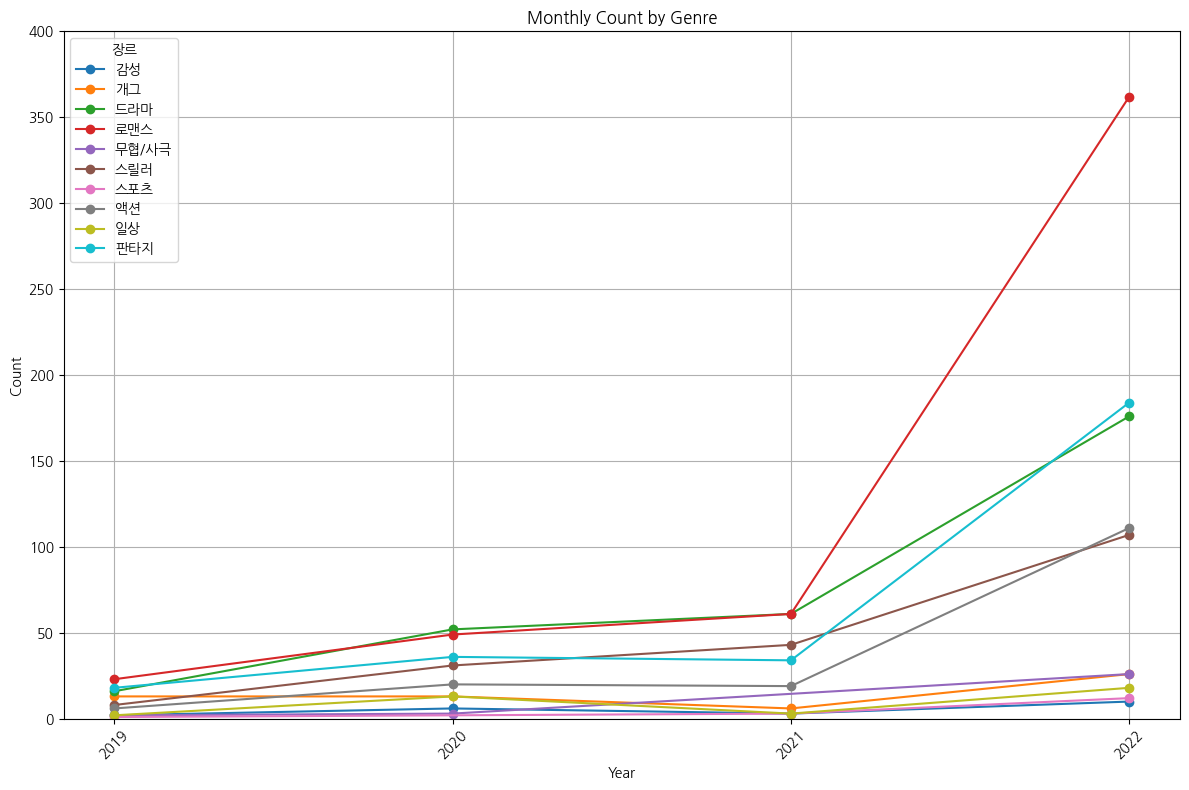

In [ ]:
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False
ym_gen = df3.groupby(['year', 'genre1'])['genre1'].count().reset_index(name='count')
plt.figure(figsize=(12, 8))

# 장르별로 그룹화하고 각 장르에 대해 선을 그림
for genre, group in ym_gen.groupby('genre1'):
    plt.plot(group['year'], group['count'], marker='o', label=genre)


plt.title('Monthly Count by Genre')
plt.xlabel('Year')
plt.ylabel('Count')
all_xticks = ym_gen['year'].unique()
interval = 1
visible_xticks = all_xticks[::interval]
plt.xticks(ticks=visible_xticks, rotation=45)
plt.ylim([0, 400])
plt.legend(title='장르')
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
df3['genre1'].value_counts()

,count
genre1,
로맨스,495
드라마,305
판타지,272
스릴러,189
액션,156
개그,58
일상,36
무협/사극,31
감성,21


In [ ]:
df3.groupby(['genre1'])['rating'].mean().sort_values(ascending=False)

,rating
genre1,
감성,9.910952
무협/사극,9.877742
로맨스,9.818444
개그,9.809655
드라마,9.729541
판타지,9.713934
스포츠,9.713125
일상,9.672500
스릴러,9.660053


In [ ]:
df3.groupby(['age'])['rating'].mean().sort_values(ascending=False)

,rating
age,
전체연령가,9.787929
12세 이용가,9.737013
15세 이용가,9.715417
18세 이용가,9.675135
정보 없음,9.569020


In [ ]:
df3['rating'].describe()

,rating
count,1579.000000
mean,9.737745
std,0.542175
min,4.010000
25%,9.760000
50%,9.900000
75%,9.950000
max,9.990000


In [ ]:
for val in df3['genre1'].unique():
    des = df3[df3['genre1']==val]['rating'].std()
    print(f'''{val}
        {des}''')

로맨스
        0.3562157781623182
판타지
        0.5857309774054449
드라마
        0.5620765532992514
스포츠
        0.3561782091406866
개그
        0.37822747039148513
일상
        0.9038880303602718
스릴러
        0.6835346940987701
액션
        0.694233032721783
무협/사극
        0.0979356822075711
감성
        0.10182852065628592


In [ ]:
df3.groupby('genre1')['rating'].std().sort_values(ascending=False).reset_index()

,genre1,rating
0,일상,0.903888
1,액션,0.694233
2,스릴러,0.683535
3,판타지,0.585731
4,드라마,0.562077
5,개그,0.378227
6,로맨스,0.356216
7,스포츠,0.356178
8,감성,0.101829
9,무협/사극,0.097936


In [ ]:
df1.groupby('genre1')['rating'].mean()

,rating
genre1,
감성,9.905455
개그,9.655435
드라마,9.761758
로맨스,9.814735
무협/사극,9.887209
스릴러,9.691120
스포츠,9.554783
액션,9.550226
일상,9.664250


In [ ]:
df1[(df1['genre1']=='로맨스')]['id'].count()

547

In [ ]:
for val in df1['genre1'].unique():
  upper_mean_count = df1[(df1['genre1']==val)&(df1['rating']>=df1[df1['genre1']==val]['rating'].mean())]['id'].count()
  print(f'''{val}: {upper_mean_count}''')

로맨스: 417
판타지: 280
드라마: 346
스포츠: 17
개그: 106
일상: 65
스릴러: 202
액션: 136
감성: 21
무협/사극: 31


### 장르별 평점 분석
---

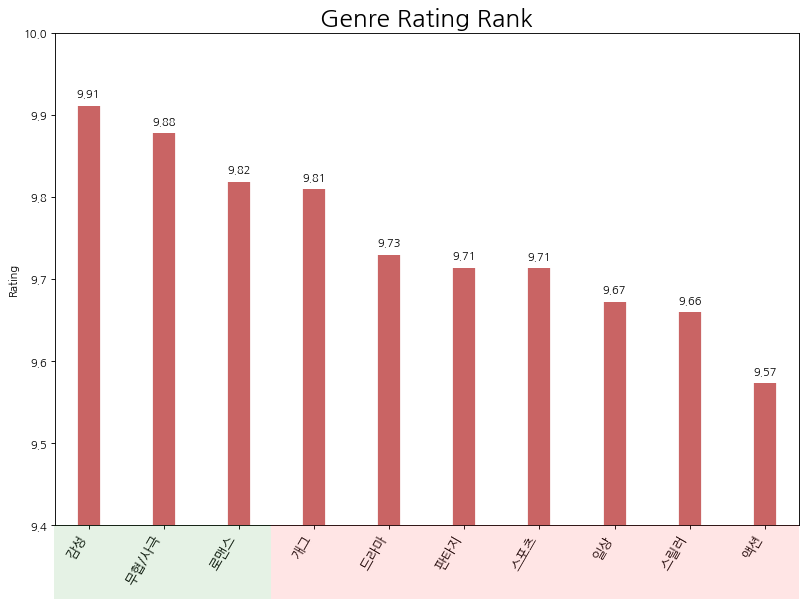

In [ ]:
genrer = df3.groupby('genre1')['rating'].mean().sort_values(ascending=False).reset_index()
fig, ax = plt.subplots(figsize=(12,8), facecolor='white', dpi= 80)
x=genrer['genre1']
y=genrer['rating']
ax.vlines(x=x, ymin=0, ymax=y, color='firebrick', alpha=0.7, linewidth=20)

for i, rating in enumerate(genrer['rating']):
    ax.text(i, rating +0.01, round(rating , 2), horizontalalignment='center')

ax.set_title('Genre Rating Rank', fontdict={'size':22})
ax.set(ylabel='Rating', ylim=(9.4, 10))
plt.xticks(x, rotation=60, horizontalalignment='right', fontsize=12)


p1 = patches.Rectangle((.124, -0.005), width=.226, height=.115, alpha=.1, facecolor='green', transform=fig.transFigure)
p2 = patches.Rectangle((.35, -0.005), width=.55, height=.115, alpha=.1, facecolor='red', transform=fig.transFigure)
fig.add_artist(p1)
fig.add_artist(p2)
plt.show()

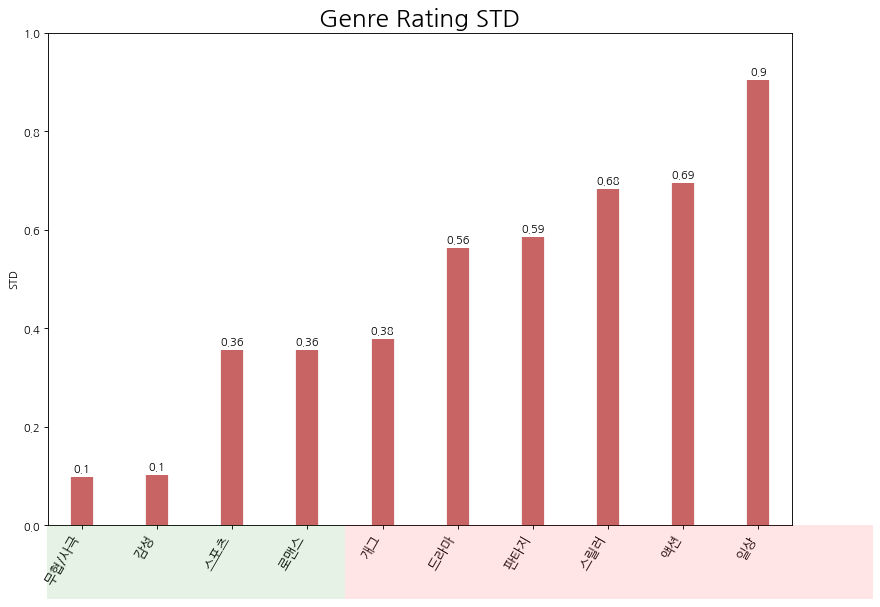

In [ ]:
genrestd = df3.groupby('genre1')['rating'].std().sort_values().reset_index()
fig, ax = plt.subplots(figsize=(12,8), facecolor='white', dpi= 80)
x=genrestd['genre1']
y=genrestd['rating']
ax.vlines(x=x, ymin=0, ymax=y, color='firebrick', alpha=0.7, linewidth=20)

for i, rating in enumerate(genrestd['rating']):
    ax.text(i, rating +0.01, round(rating , 2), horizontalalignment='center')

ax.set_title('Genre Rating STD', fontdict={'size':22})
ax.set(ylabel='STD', ylim=(0, 1))
plt.xticks(x, rotation=60, horizontalalignment='right', fontsize=12)


p1 = patches.Rectangle((.124, -0.005), width=.31, height=.115, alpha=.1, facecolor='green', transform=fig.transFigure)
p2 = patches.Rectangle((.434, -0.005), width=.55, height=.115, alpha=.1, facecolor='red', transform=fig.transFigure)
fig.add_artist(p1)
fig.add_artist(p2)
plt.show()

In [ ]:
genrecnt = df3.groupby('genre1')['rating'].count().sort_values().reset_index()
genrecnt

,genre1,rating
0,스포츠,16
1,감성,21
2,무협/사극,31
3,일상,36
4,개그,58
5,액션,156
6,스릴러,189
7,판타지,272
8,드라마,305
9,로맨스,495


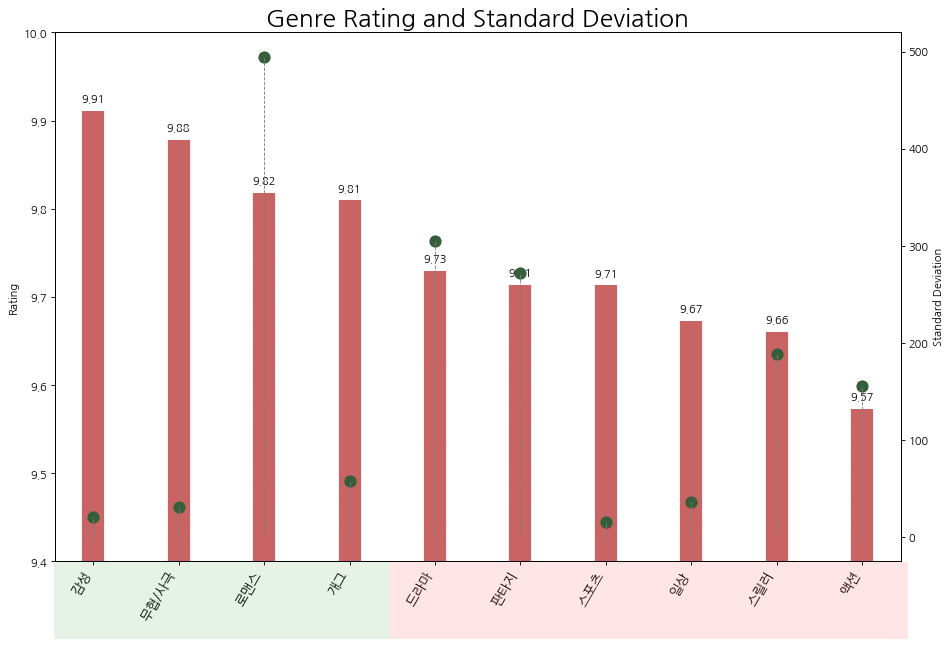

In [ ]:
x_order = genrer['genre1']
x_order_dict = {genre: i for i, genre in enumerate(x_order)}

genrecnt['position'] = genrecnt['genre1'].map(x_order_dict)
genrecnt = genrecnt.sort_values(by='position')

fig, ax1 = plt.subplots(figsize=(12, 8), facecolor='white', dpi=80)

x = genrer['genre1']
y = genrer['rating']
ax1.vlines(x=x, ymin=0, ymax=y, color='firebrick', alpha=0.7, linewidth=20)

for i, rating in enumerate(genrer['rating']):
    ax1.text(i, rating + 0.01, round(rating, 2), horizontalalignment='center')

ax1.set_title('Genre Rating and Standard Deviation', fontdict={'size':22})
ax1.set(ylabel='Rating', ylim=(9.4, 10))
ax1.set_xticks(range(len(x)))
ax1.set_xticklabels(x, rotation=60, horizontalalignment='right', fontsize=12)

ax2 = ax1.twinx()
ax2.plot(genrecnt['genre1'], genrecnt['rating'], 'o', color='#355E3B', label='Standard Deviation', markersize=10)
ax2.set_ylabel('Standard Deviation', color='black')
ax2.tick_params(axis='y', labelcolor='black')

for i, pos in enumerate(genrecnt['position']):
    cnt_value = genrecnt['rating'].iloc[i]
    ax2.plot([pos, pos], [0, cnt_value], color='gray', linestyle='--', linewidth=0.8)

p1 = patches.Rectangle((.06, -0.005), width=.35, height=.12, alpha=.1, facecolor='green', transform=fig.transFigure)
p2 = patches.Rectangle((.41, -0.005), width=.54, height=.12, alpha=.1, facecolor='red', transform=fig.transFigure)
fig.add_artist(p1)
fig.add_artist(p2)

plt.tight_layout()
plt.show()

### 형식별 평점 분석
---

In [ ]:
df3['format'].value_counts()

,count
format,
스토리,1403
에피소드,128
옴니버스,48


In [ ]:
df3.groupby(['format', 'genre1'])['genre1'].count().reset_index(name='count').sort_values(['format', 'count'], ascending=[True, False])

,format,genre1,count
3,스토리,로맨스,475
2,스토리,드라마,267
9,스토리,판타지,257
5,스토리,스릴러,162
7,스토리,액션,149
1,스토리,개그,31
4,스토리,무협/사극,28
6,스토리,스포츠,16
0,스토리,감성,15
8,스토리,일상,3


In [ ]:
# 형식별 차이도 크지 않아보임
df3.groupby('format')['rating'].mean().sort_values(ascending=False)

,rating
format,
옴니버스,9.860417
에피소드,9.775781
스토리,9.730078


In [ ]:
df3['age'].value_counts()

,count
age,
전체연령가,618
15세 이용가,504
12세 이용가,318
정보 없음,102
18세 이용가,37


In [ ]:
# 이용연령별 평점 평균
df3.groupby('age')['rating'].mean().sort_values(ascending=False)

,rating
age,
전체연령가,9.787929
12세 이용가,9.737013
15세 이용가,9.715417
18세 이용가,9.675135
정보 없음,9.569020


# 자연어 처리 키워드 분석

## 장르별 인기 작품 키워드, 연도별 키워드 변화

In [ ]:
pd.set_option('display.max_colwidth', None)
df1.head()

,id,title,author,genre,description,rating,date,completed,age,free,link,format,genre1,weekday,year,month,ym
0,756056,가난을 등에 업은 소녀,B급달궁 / 오은지,"스토리, 로맨스",흔하디 흔한 재벌후계자와 캔디도 울고 갈 박복한 가난소녀의 파란만장 동거기!인기작 <다세포소녀>의 웹툰판!,9.13,2020-10-19,True,전체연령가,True,https://comic.naver.com/webtoon/list?titleId=756056,스토리,로맨스,0,2020,10,2020-10
1,670144,가담항설,랑또,"스토리, 판타지",이번 주인공은 돌이다!돌이지만 동료도 모으고 악당도 물리친다!랑또 작가표 동양 판타지 소년만화,9.98,2020-10-07,True,12세 이용가,True,https://comic.naver.com/webtoon/list?titleId=670144,스토리,판타지,2,2020,10,2020-10
2,732071,가령의 정체불명 이야기,가령,"옴니버스, 드라마",어느 날... 인어가 내게 말을 걸어왔다. 눈을 떠보니 총구가 있었다. 그리고 몸이 연기처럼 사라지기 시작했다. 판타지보다 비현실적인 우리의 회색빛 이야기.,9.95,2020-02-03,True,15세 이용가,True,https://comic.naver.com/webtoon/list?titleId=732071,옴니버스,드라마,0,2020,2,2020-02
3,703844,가비지타임,2사장,"스토리, 스포츠","한국 최초 한국형 고교스포츠 웹툰!열혈따윈 개나 줘, 낙오자들 뿐인 농구부의 운명은?",9.96,2022-12-24,False,전체연령가,False,https://comic.naver.com/webtoon/list?titleId=703844,스토리,스포츠,5,2022,12,2022-12
4,785701,가상&RPG,주다현,"스토리, 판타지","""사람은 좀 죽여도 싸우는건 싫어해요."" 게임에서조차 집 바깥을 나가지 않는 '제리'. 전투는 한 번도 안해봤는데, 에픽 무기가 귀속되었다? 가상현실 액션 RPG 모브사가 온라인. 그 고인물들의 군상극.",9.91,2022-10-19,False,12세 이용가,False,https://comic.naver.com/webtoon/list?titleId=785701,스토리,판타지,2,2022,10,2022-10


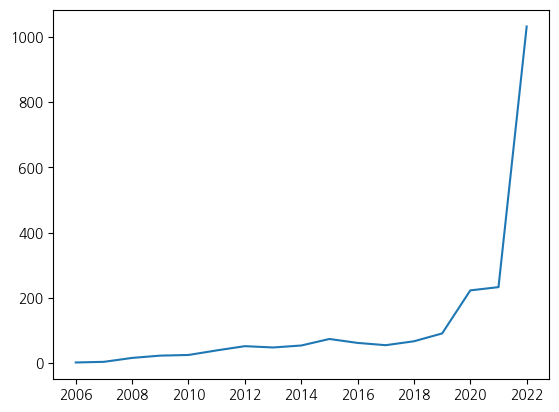

In [ ]:
year_count = df1['year'].value_counts().reset_index().sort_values('year')

plt.plot(year_count['year'],year_count['count'])
plt.show()

In [ ]:
for val in df1['genre1'].unique():
  upper_mean_count = df1[(df1['genre1']==val)&(df1['rating']>=df1[df1['genre1']==val]['rating'].mean())]['id'].count()
  print(f'''{val}: {upper_mean_count}''')

로맨스: 417
판타지: 280
드라마: 346
스포츠: 17
개그: 106
일상: 65
스릴러: 202
액션: 136
감성: 21
무협/사극: 31


In [ ]:
af = df1.copy()
af_ro = af[((af['genre1']=='로맨스')&(af['rating']>=af[af['genre1']=='로맨스']['rating'].mean()))|((af['genre1']=='감성')&(af['rating']>=af[af['genre1']=='감성']['rating'].mean()))|((af['genre1']=='드라마')&(af['rating']>=af[af['genre1']=='드라마']['rating'].mean()))]

af_fa = af[(af['genre1']=='판타지')&(af['rating']>=af[af['genre1']=='판타지']['rating'].mean())]

af_ga = af[((af['genre1']=='개그')&(af['rating']>=af[af['genre1']=='개그']['rating'].mean()))|((af['genre1']=='일상')&(af['rating']>=af[af['genre1']=='일상']['rating'].mean()))]

af_tr = af[(af['genre1']=='스릴러')&(af['rating']>=af[af['genre1']=='스릴러']['rating'].mean())]

af_ac = af[((af['genre1']=='액션')&(af['rating']>=af[af['genre1']=='액션']['rating'].mean()))|((af['genre1']=='무협/사극')&(af['rating']>=af[af['genre1']=='무협/사극']['rating'].mean()))|(((af['genre1']=='스포츠')&(af['rating']>=af[af['genre1']=='스포츠']['rating'].mean())))]


df_list = [af_ro, af_ac, af_fa, af_ga, af_tr]

In [ ]:
def normalize_text(text):
    return normalize(text)

def correct_spacing(text):
    spacing = Spacing()
    corrected_text = spacing(text)
    return corrected_text

def split_noun_sentences(text):
    okt = Okt()

    words_pos = okt.pos(text, stem=True)

    filtered_morphs = [word for word, pos in words_pos if pos != 'Josa' and len(word) > 1]

    return filtered_morphs

def load_stop_words(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        stop_words = set(line.strip() for line in file)
    return stop_words

def tokenize_and_filter(text, stop_words):
    filtered_tokens = [token for token in text if token not in stop_words]
    return filtered_tokens

def process_text(text, stop_words_file_path):
    stop_words = load_stop_words(stop_words_file_path)

    normalized_text = normalize_text(text)

    corrected_text = correct_spacing(normalized_text)

    tokens = split_noun_sentences(corrected_text)

    filtered_tokens = tokenize_and_filter(tokens, stop_words)

    return filtered_tokens

stop_words_file_path = '/content/drive/MyDrive/개인 프로젝트/10/stopwords-ko.txt'

stop words 출처: https://gist.github.com/spikeekips/40eea22ef4a89f629abd87eed535ac6a#file-stopwords-ko-txt

In [ ]:
for val in df_list:
  val['keywords'] = val['description'].apply(lambda text: process_text(text, stop_words_file_path))

In [ ]:
vectorizer = TfidfVectorizer(analyzer=lambda x: x)

X = vectorizer.fit_transform(af_ro['keywords'])

feature_names = vectorizer.get_feature_names_out()

dense = X.todense()
df = pd.DataFrame(dense, columns=feature_names)

average_tfidf = df.mean(axis=0)
romance = average_tfidf.sort_values(ascending=False)

vectorizer = TfidfVectorizer(analyzer=lambda x: x)

X = vectorizer.fit_transform(af_fa['keywords'])

feature_names = vectorizer.get_feature_names_out()

dense = X.todense()
df = pd.DataFrame(dense, columns=feature_names)

average_tfidf = df.mean(axis=0)
fantasy = average_tfidf.sort_values(ascending=False)

vectorizer = TfidfVectorizer(analyzer=lambda x: x)

X = vectorizer.fit_transform(af_ga['keywords'])

feature_names = vectorizer.get_feature_names_out()

dense = X.todense()
df = pd.DataFrame(dense, columns=feature_names)

average_tfidf = df.mean(axis=0)
comic = average_tfidf.sort_values(ascending=False)

vectorizer = TfidfVectorizer(analyzer=lambda x: x)

X = vectorizer.fit_transform(af_ac['keywords'])

feature_names = vectorizer.get_feature_names_out()

dense = X.todense()
df = pd.DataFrame(dense, columns=feature_names)

average_tfidf = df.mean(axis=0)
action = average_tfidf.sort_values(ascending=False)

vectorizer = TfidfVectorizer(analyzer=lambda x: x)

X = vectorizer.fit_transform(af_tr['keywords'])

feature_names = vectorizer.get_feature_names_out()

dense = X.todense()
df = pd.DataFrame(dense, columns=feature_names)

average_tfidf = df.mean(axis=0)
thrill = average_tfidf.sort_values(ascending=False)

In [ ]:
all_tokens = [token for sublist in af_ro['keywords'] for token in sublist]

word_counts = Counter(all_tokens)

word_freq_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Frequency'])

romance_fq = word_freq_df.sort_values(by='Frequency', ascending=False).reset_index(drop=True)


all_tokens = [token for sublist in af_fa['keywords'] for token in sublist]

word_counts = Counter(all_tokens)

word_freq_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Frequency'])

fantasy_fq = word_freq_df.sort_values(by='Frequency', ascending=False).reset_index(drop=True)


all_tokens = [token for sublist in af_ac['keywords'] for token in sublist]

word_counts = Counter(all_tokens)

word_freq_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Frequency'])

action_fq = word_freq_df.sort_values(by='Frequency', ascending=False).reset_index(drop=True)


all_tokens = [token for sublist in af_ga['keywords'] for token in sublist]

word_counts = Counter(all_tokens)

word_freq_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Frequency'])

comic_fq = word_freq_df.sort_values(by='Frequency', ascending=False).reset_index(drop=True)


all_tokens = [token for sublist in af_tr['keywords'] for token in sublist]

word_counts = Counter(all_tokens)

word_freq_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Frequency'])

thrill_fq = word_freq_df.sort_values(by='Frequency', ascending=False).reset_index(drop=True)

In [ ]:
romance = romance.reset_index()
fantasy = fantasy.reset_index()
action = action.reset_index()
comic = comic.reset_index()
thrill = thrill.reset_index()

romance.columns = ['keywords', 'importance']
fantasy.columns = ['keywords', 'importance']
action.columns = ['keywords', 'importance']
comic.columns = ['keywords', 'importance']
thrill.columns = ['keywords', 'importance']

In [ ]:
af_ro[af_ro['id'].isin([788167,693431,89097])]

,id,title,author,genre,description,rating,date,completed,age,free,link,format,genre1,weekday,year,month,ym,keywords
9,788167,가짜 동맹,케냠,"스토리, 로맨스",소꿉친구와 하루아침에 커플이 되었다?!통제가 강한 부모님들을 안심 시키고 자유롭게 생활하기 위해 동맹을 맺은 두 모범생 ‘윤세이’와 ‘김재하’.동맹을 들킬 위기를 모면하기 위한 두 사람의 가짜 커플 행세가 시작된다!,9.98,2022-12-27,False,12세 이용가,False,https://comic.naver.com/webtoon/list?titleId=788167,스토리,로맨스,1,2022,12,2022-12,"[소꿉친구, 하루아침, 커플, 통제, 강하다, 부모님, 안심, 자유롭다, 생활, 동맹, 맺다, 모범생, 세이, 김재, 동맹, 들키다, 위기, 모면, 사람, 가짜, 커플, 행세, 시작]"
73,693431,계룡선녀전,돌배,"스토리, 드라마","고려, 조선시대를 거쳐 바리스타가 된 계룡산 선녀님(女, 699세)환생한 서방님과 날개옷을 찾을 수 있을까",9.98,2018-03-14,True,전체연령가,True,https://comic.naver.com/webtoon/list?titleId=693431,스토리,드라마,2,2018,3,2018-03,"[고려, 조선시대, 거치다, 바리스타, 계룡산, 선녀, 환생하다, 서방, 날개, 찾다]"
77,89097,고고루키루,한경찰,"옴니버스, 드라마","정체불명의 3인조, 천진난만 켄, 카리스마 선녀, 쉬크노노\n루키루가 만들어내는 황당무계하지만 따뜻한 이야기들. 지금부터 루키루와 함께 고고",9.96,2013-12-27,True,전체연령가,False,https://comic.naver.com/webtoon/list?titleId=89097,옴니버스,드라마,4,2013,12,2013-12,"[정체, 불명, 난만, 카리스마, 선녀, 크다, 루키루, 만들다, 당무, 따뜻하다, 지금, 루키루, 고고]"


In [ ]:
[788167,693431,89097]

In [ ]:
imp_list = [romance, fantasy, comic, action, thrill]
frq_list = [romance_fq, fantasy_fq, comic_fq, action_fq, thrill_fq]

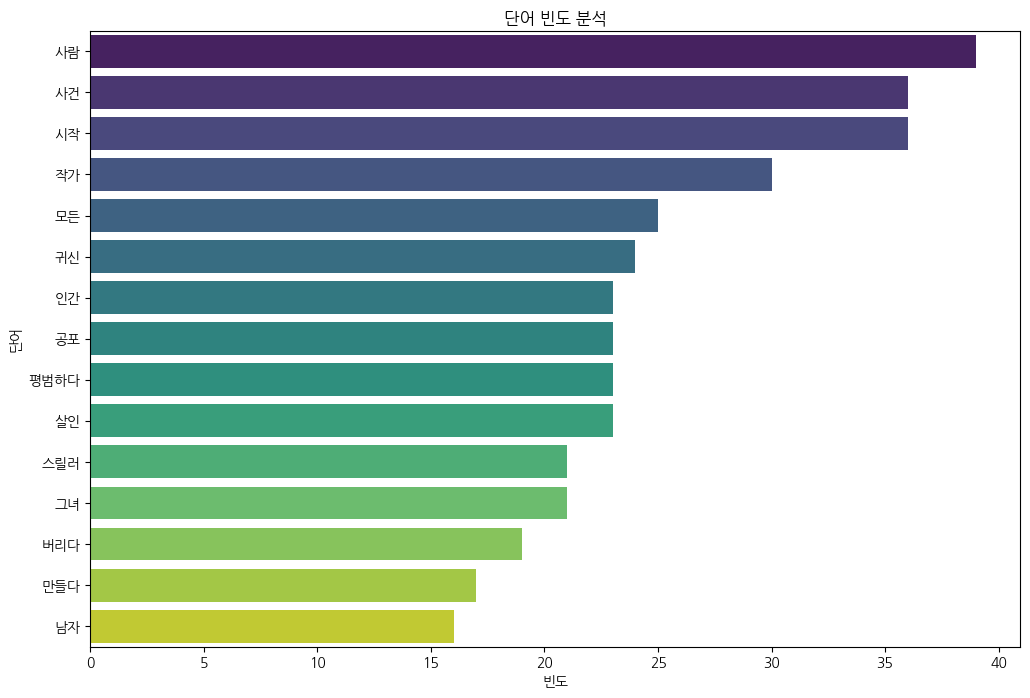

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Frequency', y='Word', data=thrill_fq.head(15), palette='viridis')
plt.title('단어 빈도 분석')
plt.xlabel('빈도')
plt.ylabel('단어')
plt.show()

In [ ]:
pip install wordcloud matplotlib konlpy

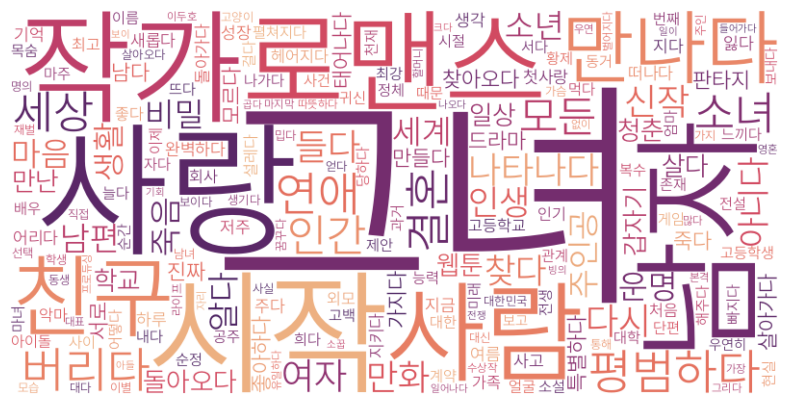

In [ ]:
from wordcloud import WordCloud
from PIL import Image

word_freq = dict(zip(romance['keywords'], romance['importance']))

wordcloud = WordCloud(font_path='/content/drive/MyDrive/개인 프로젝트/10/font/SUIT-Light.otf',  # 한글 폰트 경로 설정
                      width=800, height=400,
                      background_color='white', colormap='flare').generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

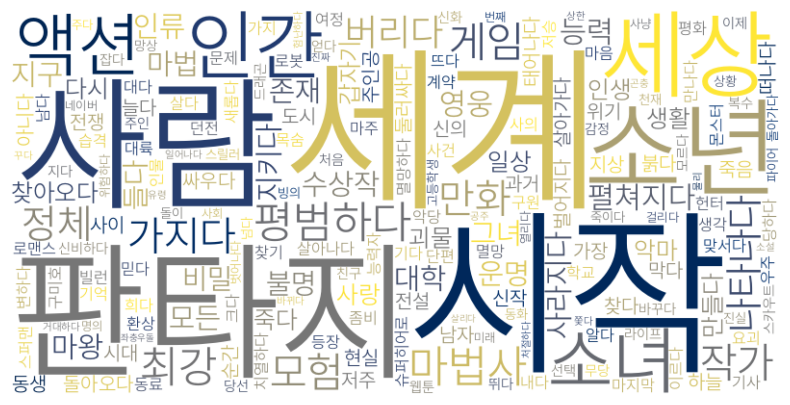

In [ ]:
word_freq = dict(zip(fantasy['keywords'], fantasy['importance']))

wordcloud = WordCloud(font_path='/content/drive/MyDrive/개인 프로젝트/10/font/SUIT-Light.otf',  # 한글 폰트 경로 설정
                      width=800, height=400,
                      background_color='white', colormap='cividis').generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

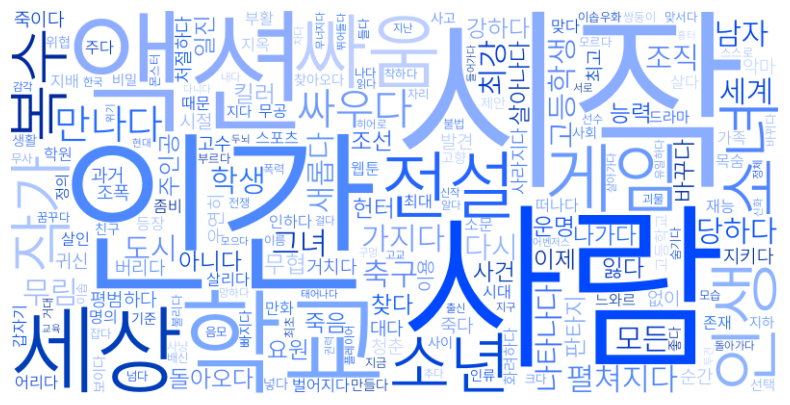

In [ ]:
word_freq = dict(zip(action['keywords'], action['importance']))

def color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl({:d},100%, {:d}%)".format(np.random.randint(220,225),np.random.randint(30,90)))

wordcloud = WordCloud(font_path='/content/drive/MyDrive/개인 프로젝트/10/font/SUIT-Light.otf',  # 한글 폰트 경로 설정
                      width=800, height=400,
                      background_color='white', color_func = color_func).generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

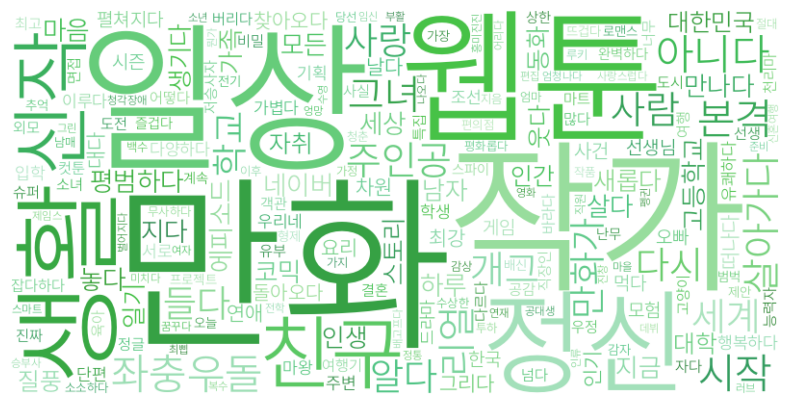

In [ ]:
word_freq = dict(zip(comic['keywords'], comic['importance']))

def color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl({:d},50%, {:d}%)".format(np.random.randint(120,148), np.random.randint(35,80)))

wordcloud = WordCloud(font_path='/content/drive/MyDrive/개인 프로젝트/10/font/SUIT-Light.otf',  # 한글 폰트 경로 설정
                      width=800, height=400,
                      background_color='white', color_func = color_func).generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

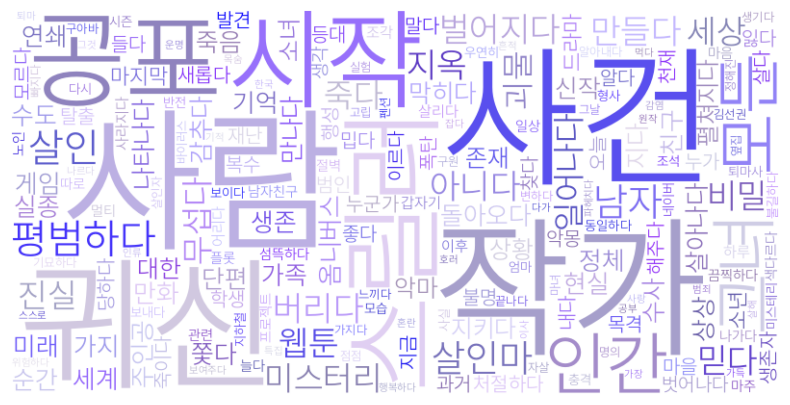

In [ ]:
word_freq = dict(zip(thrill['keywords'], thrill['importance']))

def color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl({:d},{:d}%, {:d}%)".format(np.random.randint(240,270),np.random.randint(20,100),np.random.randint(50,90)))

wordcloud = WordCloud(font_path='/content/drive/MyDrive/개인 프로젝트/10/font/SUIT-Light.otf',  # 한글 폰트 경로 설정
                      width=800, height=400,
                      background_color='white', color_func = color_func).generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

베스트 도전 웹툰 키워드 토큰화

In [ ]:
df2['keywords'] = df2['description'].apply(lambda text: process_text(text, stop_words_file_path))

In [ ]:
be = df2.copy()

be_ro = be[((be['genre1']=='pure')|(be['genre2']=='pure'))|((be['genre1']=='sensibility')|(be['genre1']=='sensibility'))|((be['genre1']=='drama')|(be['genre2']=='drama'))]

be_fa = be[((be['genre1']=='fantasy')|(be['genre2']=='fantasy'))]

be_ga = be[((be['genre1']=='comic')|(be['genre2']=='comic'))|((be['genre1']=='daily')|(be['genre1']=='daily'))]

be_tr = be[((be['genre1']=='thrill')|(be['genre2']=='thrill'))]

be_ac = be[((be['genre1']=='action')|(be['genre2']=='action'))|((be['genre1']=='historical')|(be['genre1']=='historical'))|((be['genre1']=='sports')|(be['genre2']=='sports'))]

df2_list = [be_ro, be_ac, be_fa, be_ga, be_tr]

In [ ]:
def find_similar_webtoons(pop_df, best_df):
    # TF-IDF 벡터화
    vectorizer = TfidfVectorizer()

    # 인기 웹툰 키워드와 중요도
    pop_keywords = pop_df.apply(lambda row: f'{row["keywords"]}:{row["importance"]}', axis=1)

    # TF-IDF 행렬 생성
    pop_tfidf_matrix = vectorizer.fit_transform(pop_keywords)

    # 베스트 도전 웹툰 키워드
    best_keywords = best_df['keywords'].astype(str).tolist()
    best_tfidf_matrix = vectorizer.transform(best_keywords)

    # 유사도 계산
    similarities = cosine_similarity(best_tfidf_matrix, pop_tfidf_matrix).mean(axis=1)

    # 베스트 도전 웹툰에 유사도 추가
    best_df['similarity'] = similarities
    top_webtoons = best_df.sort_values(by='similarity', ascending=False).reset_index(drop=True).head(10)

    return top_webtoons[['id', 'title', 'author', 'summary', 'rating', 'genre', 'format', 'description', 'similarity']]

def find_similar_webtoons_fq(pop_df, best_df):

    vectorizer = TfidfVectorizer()

    pop_keywords = pop_df.apply(lambda row: f'{row["Word"]}:{row["Frequency"]}', axis=1)

    pop_tfidf_matrix = vectorizer.fit_transform(pop_keywords)

    best_keywords = best_df['keywords'].astype(str).tolist()
    best_tfidf_matrix = vectorizer.transform(best_keywords)

    similarities = cosine_similarity(best_tfidf_matrix, pop_tfidf_matrix).mean(axis=1)

    best_df['similarity'] = similarities
    top_webtoons = best_df.sort_values(by='similarity', ascending=False).reset_index(drop=True).head(10)

    return top_webtoons[['id', 'title', 'author', 'summary', 'rating', 'genre', 'format', 'description', 'similarity']]

In [ ]:
ro_imp_title = find_similar_webtoons(romance, be_ro)
fa_imp_title = find_similar_webtoons(fantasy, be_fa)
ac_imp_title = find_similar_webtoons(action, be_ac)
ga_imp_title = find_similar_webtoons(comic, be_ga)
tr_imp_title = find_similar_webtoons(thrill, be_tr)

ro_frq_title = find_similar_webtoons_fq(romance_fq, be_ro)
fa_frq_title = find_similar_webtoons_fq(fantasy_fq, be_fa)
ac_frq_title = find_similar_webtoons_fq(action_fq, be_ac)
ga_frq_title = find_similar_webtoons_fq(comic_fq, be_ga)
tr_frq_title = find_similar_webtoons_fq(thrill_fq, be_tr)

imp_result = [ro_imp_title, fa_imp_title, ac_imp_title, ga_imp_title, tr_imp_title]
imp_df = pd.concat(imp_result, ignore_index=True)
imp_df = imp_df.drop_duplicates(subset='title').sort_values(by='similarity', ascending=False).reset_index(drop=True)

frq_result = [ro_frq_title, fa_frq_title, ac_frq_title, ga_frq_title, tr_frq_title]
frq_df = pd.concat(frq_result, ignore_index=True)
frq_df = frq_df.drop_duplicates(subset='title').sort_values(by='similarity', ascending=False).reset_index(drop=True)

result = [imp_df, frq_df]
total_df = pd.concat(result, ignore_index=True)
total_df = total_df.drop_duplicates(subset='title').sort_values(by=['similarity'], ascending=False).reset_index(drop=True)

In [ ]:
total_df.head(10)

,id,title,author,summary,rating,genre,format,description,similarity
0,506155,버츄얼 패밀리,noma****,가족 시트콤,9.84,"comic, drama",스토리,"내일 당장 무슨 일을 벌일지 모르는 아빠와 세상에서 가장 운이 없는 엄마, 우울함의 끝을 달리는 삼촌과 태권도복을 좋아하는 조숙한 어린이 훈희. 바람 잘 날 없는 사랑과 정의의 도시 고남시에서 살아가는 가족들",0.002943
1,766848,싱글맘맘이야,gima****,싱글맘의 생생 실화,9.92,"daily, sensibility",에피소드,"김말이는 저 좋은것만 하다가 별 이뤄놓은 거 없이 나이만 먹고, 세상에 없을 착한 남자를 만나 철썩같이 믿고 결혼을 한 뒤 아기를 낳았다. 소박하고 단출한 형편이지만 일상이 변함없이 평화롭게 유지될거라고만 믿었던 그녀에게 어느날 갑자기 남편은 이혼을 통보해오고... 모든게 두렵기만 한 순두부 멘탈의 그녀 곁에는 12개월의 딸아이와 10살이 넘은 잔소리꾼 암고양이 샤샤뿐. 이 세 가족의 가장이 된 그녀는 우울함을 털고 세상에 대해서 뒤늦게 배워보기로 마음을 먹는다. 다소 걱정스러워보이지만 나름 고군분투하는 싱글맘의 맘에 대한 현재 진행형 실화",0.002867
2,747122,직업 : 며느리,happ****,직접 겪은 에피소드,9.54,daily,에피소드,"신세대라고 생각하는 시어머니와, 현생을 살고 있는 며느리 '쿄쿄'. 살면서 부딪히고, 깎이며 만들어지는 수 많은 가족 에피소드를 과장없이 현실적이게 보여드릴게요. 직접 겪은 실화로만 이루어진 이야기며 수 많은 며느리들 중 한명은 이렇게 살고 있다고 보여드리고 싶어요. 연재주기는 1~2주에 한편 업로드 됩니다 :) 오랜 시간동안 돌아오지 못하거나 사정이 여의치 않은 경우 블로그에 제일 먼저 공지가 올라갑니다. *남편 봉봉씨와 연재가 합의된 상태이며 시어머니께서도 연재하는걸 알고계시고, 생각나실때마다 보고계십니다. 마지막으로 응원해주시는 모든 분들 항상 감사하게 생각하고 있습니다. 그 감사함, 조금씩이나마 돌려드리기 위해 종종 블로그 이벤트를 진행하니 가끔가다 들려주세요!",0.002608
3,756288,흙수저를 위한 나라는 없다,pusi****,흙수저 성장기,9.62,daily,옴니버스,"실화다 내 경험을 바탕으로 담담하게 그린 웹툰이니 맘에 안들면 나가거나 악플을 남겨도 좋다.\r\n\r\n사람은 자기가 살아온 수준을 결코 벗어나지 못한다. 아무리 티비니 인터넷으로 간접체험해봐도 한계가 있다. 나는 내가 얼마나 가난하게 살았었는가를 깨닫기까지 30년 가까운 세월이 걸렸다.\r\n실제로 나의 가족은 전통시장어귀나 공단근처 혹은 유흥가주변의 저렴한 전세나 월세집을 오가며 살았다.. \r\n\r\n내가 다녔던 중, 고등학교에는 나와 비슷한 처지거나 혹은 더 나쁜 경우의 아이들이 많았다. 편부모, 이혼가정, 혹은 할머니가 혼자서 키우는 아이라던지, 부모는 시장에서 장사를 한다거나, 무슨일을 하는지 정확히 알 수 없는 사연이 많은 아이들.",0.002596
4,583173,그림자도마뱀사기극,plus****,소소한 유쾌 판타지,9.80,"comic, fantasy",스토리,늘 의욕은 넘치지만 성과는 미미한 발명가 렛에게 어느 날 큰 도마뱀 한 마리를 퇴치해 달라는 의뢰가 들어온다. 렛은 남장을 한 채로 달르라는 청년이 사는 문제의 집에 찾아가는데... 눈치 없는 두 사람과 도마뱀 사이에서 벌어지는 시시콜콜 유쾌한 판타지. 장르 : 판타지 / 유머\n(매주 월요일 연재합니다.),0.002387
5,759080,방구석수필,dksd****,실화 단편 에피소드,9.90,"daily, sensibility",에피소드,"어려웠던 본인의 어린시절 치매에 걸렸던 이웃 할머니, 가난하지만 밝게 살던 친구, 나를 도와줬던 문신있던 목사님, 아낌없이 주던 친형님, 군대에서 만났던 사람들.. 여러 고마웠던 사람들에 대한 본인의 기억들. 실화 단편 에피소드들",0.002323
6,729957,피노키오의 소녀,1996****,수상한 마을의 비밀,9.72,"drama, thrill",스토리,10년 만에 예전에 살던 고향으로 돌아간 주인공 미아.\r\n사람이 죽어나가는 이상한 마을에 거짓말을 반복하는 자신의 쌍둥이 언니\r\n과연 범인은?\r\n이러한 무서운 소문에도 끊임없이 마을로 이사를 오는 사람들.\r\n마을에 숨겨진 비밀은?,0.002289
7,776987,soso한 보통의,zieu****,보통의 일상들,9.83,"daily, sensibility",에피소드,"인생에서 가장 아름답다는 20대, 정신 차려보니 벌써 절반이나 지났다고?\r\n벌써 자리를 잡고 앞으로 나아가는 친구들, 방황하는 친구들, 그리고 뭐 하나 이뤄낸 것 없이 졸업을 앞둔 나. 알 수 없는 칠흑같은 미래, 그럼에도 품어보는 일말의 희망. 그 긴 항해의 시간동안 느끼는 소소하고 평범한 감정들을 일기처럼 적어본다.",0.002241
8,734786,모던 던전 판타지아,lsc2****,골드러쉬 던전판타지,9.83,"comic, fantasy",스토리,"“그 문이 다시는 열려선 안 됩니다.”\r\n\r\n고된 여정 끝에 던전의 여왕을 쓰러뜨린 모험가 파티 「던사모」. 그러나 기쁨도 잠시, 단장 앨런은 던전의 위험성을 경고하며 그 문을 영영 봉인하고자 한다.\r\n그로부터 40년, 젊은 세대에서 「던전 붐」이 일어나 개방의 목소리는 높아져만 가고 결국 상황을 걷잡을 수 없게 된 앨런은 헤어진 옛 동료, 엘프마법사 린델을 찾아가 던전 개발 모험단에 참가하라고 하는데…\r\n\r\n젊은이여, 기회의 땅 던전으로!\r\n본격 골드러쉬 던전 판타지!",0.002199
9,628856,클라푸티 듀스,m_****,미소녀 디저트 만화,9.84,comic,스토리,잘생긴 외모로 여학생들의 맘을 설레게 하는 미래여고의 인기인 강서연. 디저트 동아리 <클라푸티 듀스>에서 우연히 밝혀지는 그녀의 비밀은...? 작은 동아리방에서 벌어지는 달콤한 디저트 강좌! 백합 향기 가득한 미소녀 티타임!,0.002174


In [ ]:
imp_df['title'].unique()

array(['싱글맘맘이야', '직업 : 며느리', '흙수저를 위한 나라는 없다', '그림자도마뱀사기극', '방구석수필',
       'soso한 보통의', '모던 던전 판타지아', '클라푸티 듀스', '제제와 함께', '학의동굴', '귀각시',
       '아마데우스', '악귀의 메아리', '확진자Z', '메모리얼', '낙타의 숲', '이매무당전', '24시간',
       '경계 界', '은하!', '그대로 멈춰라', '자이언트(THE HERO)', '빅타이거', '아이돌 스파이',
       '악마인간', '일월의 선화', '선수들', '용사가 되고 싶지 않아', '초능력의 도시', '던전의 주인님',
       '에이디', '신기관리팀 처용대', '짐승의 이빨처럼', 'Baby Boy Brother', '밤을 거둔 신기루는',
       '1년 동안 잘 부탁해!', '취사병 전설이 되다', '스크류 드라이버', '원포인트', '대공녀는 거기에 없었다',
       '고민상담특별부', '바람을 실은 메아리 (바람과 소원)'], dtype=object)

In [ ]:
frq_df['title'].unique()

array(['싱글맘맘이야', '직업 : 며느리', '흙수저를 위한 나라는 없다', '그림자도마뱀사기극', '방구석수필',
       '고민상담특별부', '버츄얼 패밀리', '제제와 함께', '클라푸티 듀스', '모던 던전 판타지아', '학의동굴',
       '귀각시', '아마데우스', '메모리얼', '확진자Z', '피노키오의 소녀', '이매무당전', '악귀의 메아리',
       '경계 界', '은하!', '빅타이거', '자이언트(THE HERO)', '아이돌 스파이', '악마인간', '선수들',
       '낙타의 숲', '큐레이터', '그대로 멈춰라', '백설공주와 마녀의 계약', '일월의 선화', '에이디',
       '바리의 영혼', '신기관리팀 처용대', '스크류 드라이버', '1년 동안 잘 부탁해!',
       'Baby Boy Brother', '짐승의 이빨처럼', '밤을 거둔 신기루는', '원포인트',
       '대공녀는 거기에 없었다', '연애사색', '취사병 전설이 되다', '바람을 실은 메아리 (바람과 소원)'],
      dtype=object)

In [ ]:
ro_title = pd.concat([ro_imp_title, ro_frq_title], ignore_index=True)
ro_title = ro_title.drop_duplicates(subset='title').sort_values(by=['similarity'], ascending=False).reset_index(drop=True)
fa_title = pd.concat([fa_imp_title, fa_frq_title], ignore_index=True)
fa_title = fa_title.drop_duplicates(subset='title').sort_values(by=['similarity'], ascending=False).reset_index(drop=True)
ga_title = pd.concat([ga_imp_title, ga_frq_title], ignore_index=True)
ga_title = ga_title.drop_duplicates(subset='title').sort_values(by=['similarity'], ascending=False).reset_index(drop=True)
ac_title = pd.concat([ac_imp_title, ac_frq_title], ignore_index=True)
ac_title = ac_title.drop_duplicates(subset='title').sort_values(by=['similarity'], ascending=False).reset_index(drop=True)
tr_title = pd.concat([tr_imp_title, tr_frq_title], ignore_index=True)
tr_title = tr_title.drop_duplicates(subset='title').sort_values(by=['similarity'], ascending=False).reset_index(drop=True)

In [ ]:
print(f'''장르별 추천 베스트 도전 웹툰
로맨스 / 드라마 / 감성
{ro_title['title']}

판타지
{fa_title['title']}

액션 / 무협/사극 / 스포츠
{ac_title['title']}

개그 / 일상
{ga_title['title']}

스릴러
{tr_title['title']}
''')

장르별 추천 베스트 도전 웹툰
로맨스 / 드라마 / 감성
0                    연애사색
1                짐승의 이빨처럼
2        Baby Boy Brother
3              밤을 거둔 신기루는
4            1년 동안 잘 부탁해!
5              취사병 전설이 되다
6                스크류 드라이버
7                    원포인트
8            대공녀는 거기에 없었다
9                 고민상담특별부
10    바람을 실은 메아리 (바람과 소원)
Name: title, dtype: object

판타지
0         백설공주와 마녀의 계약
1               바리의 영혼
2                이매무당전
3                  은하!
4           취사병 전설이 되다
5              그대로 멈춰라
6                 빅타이거
7               일월의 선화
8              던전의 주인님
9                  에이디
10    Baby Boy Brother
11           신기관리팀 처용대
Name: title, dtype: object

액션 / 무협/사극 / 스포츠
0              낙타의 숲
1               큐레이터
2           짐승의 이빨처럼
3               경계 界
4               원포인트
5               빅타이거
6     자이언트(THE HERO)
7            아이돌 스파이
8               악마인간
9                선수들
10      용사가 되고 싶지 않아
11           초능력의 도시
Name: title, dtype: object

개그 / 일상
0            버츄얼 패밀리
1             싱글맘맘이야

In [ ]:
ro_title[['title', 'author', 'summary', 'genre', 'format']]

,title,author,summary,genre,format
0,연애사색,jeon****,20대 연애 기록,"drama, pure",스토리
1,짐승의 이빨처럼,shad****,작수를 죽인다.,"action, drama",스토리
2,Baby Boy Brother,roze****,연하남 9인 공략기,"fantasy, pure",스토리
3,밤을 거둔 신기루는,kims****,부적 남주 쟁취기,"fantasy, pure",스토리
4,1년 동안 잘 부탁해!,mono****,우당탕탕 기숙학교!,"drama, pure",스토리
5,취사병 전설이 되다,leej****,군대요리 판타지만화,"fantasy, drama",스토리
6,스크류 드라이버,cenc****,아이를 잃은 아버지,"drama, thrill",스토리
7,원포인트,joko****,배구를통한성장드라마,"drama, sports",스토리
8,대공녀는 거기에 없었다,mihy****,가상중세시대물,"drama, historical",스토리
9,고민상담특별부,vhxm****,랭킹 시스템 학교,"comic, drama",스토리


In [ ]:
total_df[['title', 'author', 'summary', 'genre', 'format']].tail(10)

,title,author,summary,genre,format
38,짐승의 이빨처럼,shad****,작수를 죽인다.,"action, drama",스토리
39,Baby Boy Brother,roze****,연하남 9인 공략기,"fantasy, pure",스토리
40,밤을 거둔 신기루는,kims****,부적 남주 쟁취기,"fantasy, pure",스토리
41,1년 동안 잘 부탁해!,mono****,우당탕탕 기숙학교!,"drama, pure",스토리
42,취사병 전설이 되다,leej****,군대요리 판타지만화,"fantasy, drama",스토리
43,스크류 드라이버,cenc****,아이를 잃은 아버지,"drama, thrill",스토리
44,원포인트,joko****,배구를통한성장드라마,"drama, sports",스토리
45,대공녀는 거기에 없었다,mihy****,가상중세시대물,"drama, historical",스토리
46,고민상담특별부,vhxm****,랭킹 시스템 학교,"comic, drama",스토리
47,바람을 실은 메아리 (바람과 소원),vari****,정식연재공지!,drama,스토리
